<a href="https://colab.research.google.com/github/njokinjuguna/Machine-learning-Models/blob/main/ML_MODEL_FROM_SCRATCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AN ML PROJECT FROM SCRATCH

#Load data


In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# **Data preparation**


## data separation as x and y

In [5]:
y=df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [6]:
x =df.drop('logS',axis=1) ##hear we are getting x where x axis will contain the other colums(MolLogP	MolWt	NumRotatableBonds	AromaticProportion) but not the not logs column hence we say drop colum logs on axis 1 where 1 is the columns and axis 0 is the rows
x


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Data Splitting into training and testing set


In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=100)


In [13]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [14]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [22]:
y_train

,logS
107,-4.440
378,-1.250
529,-1.655
546,-1.886
320,-0.740
...,...
802,-2.925
53,-2.680
350,-7.020
79,-4.800


In [23]:
y_test

,logS
822,-3.380
118,-8.010
347,-2.160
1123,-1.170
924,-0.730
...,...
1114,-4.130
427,-9.018
711,-0.600
4,-3.040


#**Model Building**

## **Linear Regression(f(x)=y)**

### **Training the model**

In [16]:
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
lr = LinearRegression()

# Fit the model on the training data
lr.fit(x_train, y_train)

LinearRegression()

### **Applying the model to make prediction**

In [34]:
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)

#y_lr_train_pred

In [35]:
#y_lr_test_pred

### **Evaluate model performance**

In [30]:
from sklearn.metrics import mean_squared_error,r2_score

lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [31]:
print('LR Mean square error(mse) Train: ',lr_train_mse)
print('LR R2(root square) Train: ',lr_train_r2)
print('LR Mean square error(mse) Test: ',lr_test_mse)
print('LR R2(root square) Test: ',lr_test_r2)

LR Mean square error(mse) Train:  1.0075362951093687
LR R2(root square) Train:  0.7645051774663391
LR Mean square error(mse) Test:  1.0206953660861033
LR R2(root square) Test:  0.7891616188563282


In [33]:
lr_results=pd.DataFrame(['Linear regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest**

### **Training the model**

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make prediction**

In [37]:
y_rf_train_pred=rf.predict(x_train)
y_rf_test_pred=rf.predict(x_test)


### **Evaluate model performance**

In [38]:
from sklearn.metrics import mean_squared_error,r2_score

rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)

rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)

In [39]:
rf_results=pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Ridge Regression**

### **Train the model**

In [46]:
from sklearn.linear_model import Ridge
# Initialize and train the Ridge Regression model
ridge_reg = Ridge(alpha=1.0) #0.5
ridge_reg.fit(x_train, y_train)

Ridge()

### **Applying the model to make prediction**

In [47]:
y_ridge_reg_train_pred = ridge_reg.predict(x_train)
y_ridge_reg_test_pred = ridge_reg.predict(x_test)

### **Evaluate model performance**

In [48]:
from sklearn.metrics import mean_squared_error,r2_score

ridge_reg_train_mse=mean_squared_error(y_train,y_ridge_reg_train_pred)
ridge_reg_train_r2=r2_score(y_train,y_ridge_reg_train_pred)

ridge_reg_test_mse=mean_squared_error(y_test,y_ridge_reg_test_pred)
ridge_reg_test_r2=r2_score(y_test,y_ridge_reg_test_pred)

In [50]:
ridge_reg_results=pd.DataFrame(['Ridge Regression',ridge_reg_train_mse,ridge_reg_train_r2,ridge_reg_test_mse,ridge_reg_test_r2]).transpose()
ridge_reg_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']
ridge_reg_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Ridge Regression,1.007539,0.764505,1.020625,0.789176


## **Model comparison**

## **Data visualization of prediction results**

In [52]:
df_models=pd.concat([lr_results,rf_results,ridge_reg_results],axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223
2,Ridge Regression,1.007539,0.764505,1.020625,0.789176


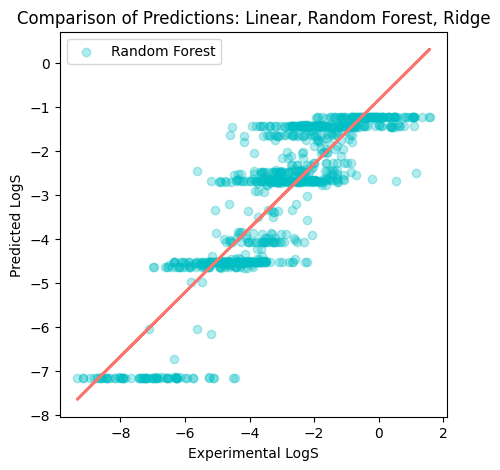

In [60]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5));

# # Scatter plot for Linear Regression predictions
# plt.scatter(y_train, y_lr_train_pred, c="#7CAE00", alpha=0.3, label='Linear Regression')

# Scatter plot for Random Forest predictions
plt.scatter(y_train, y_rf_train_pred, c="#00BFC4", alpha=0.3, label='Random Forest')

# # Scatter plot for Ridge Regression predictions
# plt.scatter(y_train, y_ridge_reg_train_pred, c="#F8766D", alpha=0.3, label='Ridge Regression')

# # Adding a line of best fit for each of the models
# z = np.polyfit(y_train, y_lr_train_pred, 1)
# p = np.poly1d(z)
# plt.plot(y_train, p(y_train), "#F8766D", linewidth=2)


z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), "#F8766D", linewidth=2)


# z = np.polyfit(y_train, y_ridge_reg_train_pred, 1)
# p = np.poly1d(z)
# plt.plot(y_train, p(y_train), "#F8766D", linewidth=2)

# Labels and legend
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.legend()
plt.title('Comparison of Predictions: Linear, Random Forest, Ridge')
plt.show()